In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.special import softmax


from random import sample
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("dataframes/short_features_logits.pkl")

In [3]:
random_classes = sample(list(df["Class Idx"].unique()), 5)
dog_classes = [51, 52, 53, 54, 55]

In [4]:
def manifold_plot(features, labels, **kwargs):

    if "mode" in kwargs:
        mode = kwargs.pop("mode")
    else:
        mode = "tsne"

    if mode == "pca":
        embedder = PCA(n_components=2)
    else:
        embedder = TSNE(n_components=2, random_state=0, perplexity=30)

    embedding = embedder.fit_transform(np.stack(features))
    combined = pd.DataFrame(embedding)
    combined.columns = ["Dim1", "Dim2"]
    combined["labels"] = labels.to_numpy()
    sns.scatterplot(data = combined, x="Dim1", y="Dim2", hue="labels", **kwargs)

In [5]:
df_part = df[df["Class Idx"].isin(random_classes)]

In [6]:
df_part["Class Idx"].unique()

array([88,  0, 25, 29, 67])

In [21]:
df_part["Net"] = df_part["Network Name"]
df_part["Distr."] = df_part["Distribution"]

<ipython-input-21-0ec62a2d554a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part["Net"] = df_part["Network Name"]
<ipython-input-21-0ec62a2d554a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part["Distr."] = df_part["Distribution"]


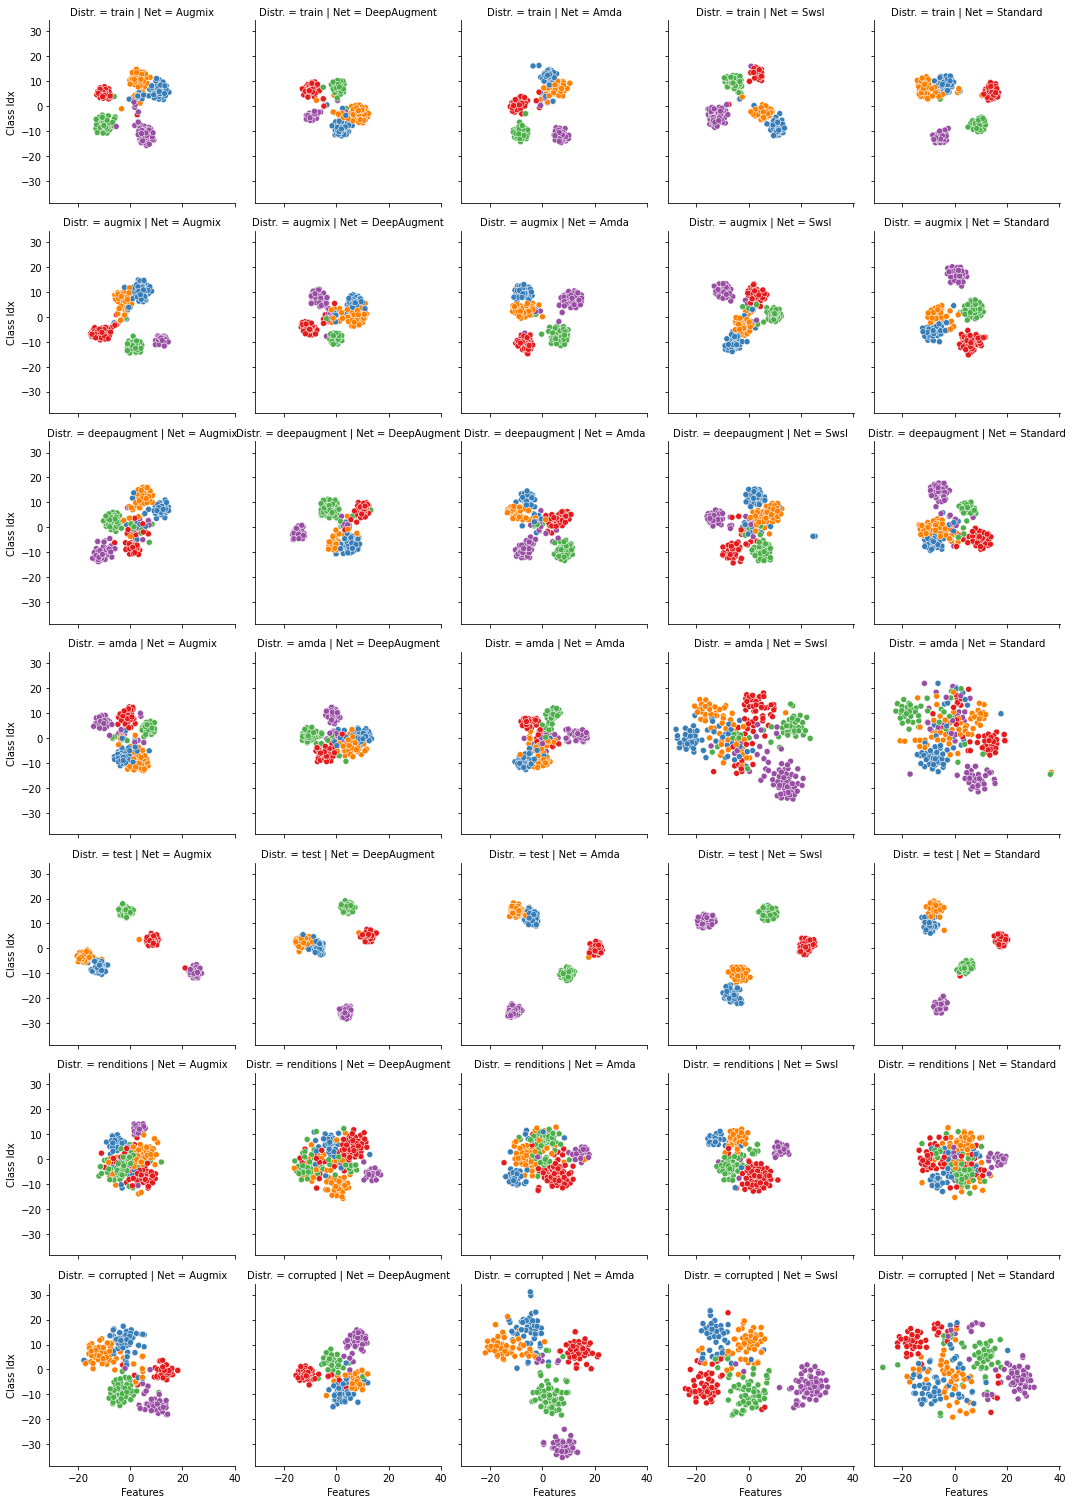

In [22]:
g = sns.FacetGrid(df_part, col="Net", row="Distr.")
g.map(manifold_plot, "Features", "Class Idx", palette="Set1")

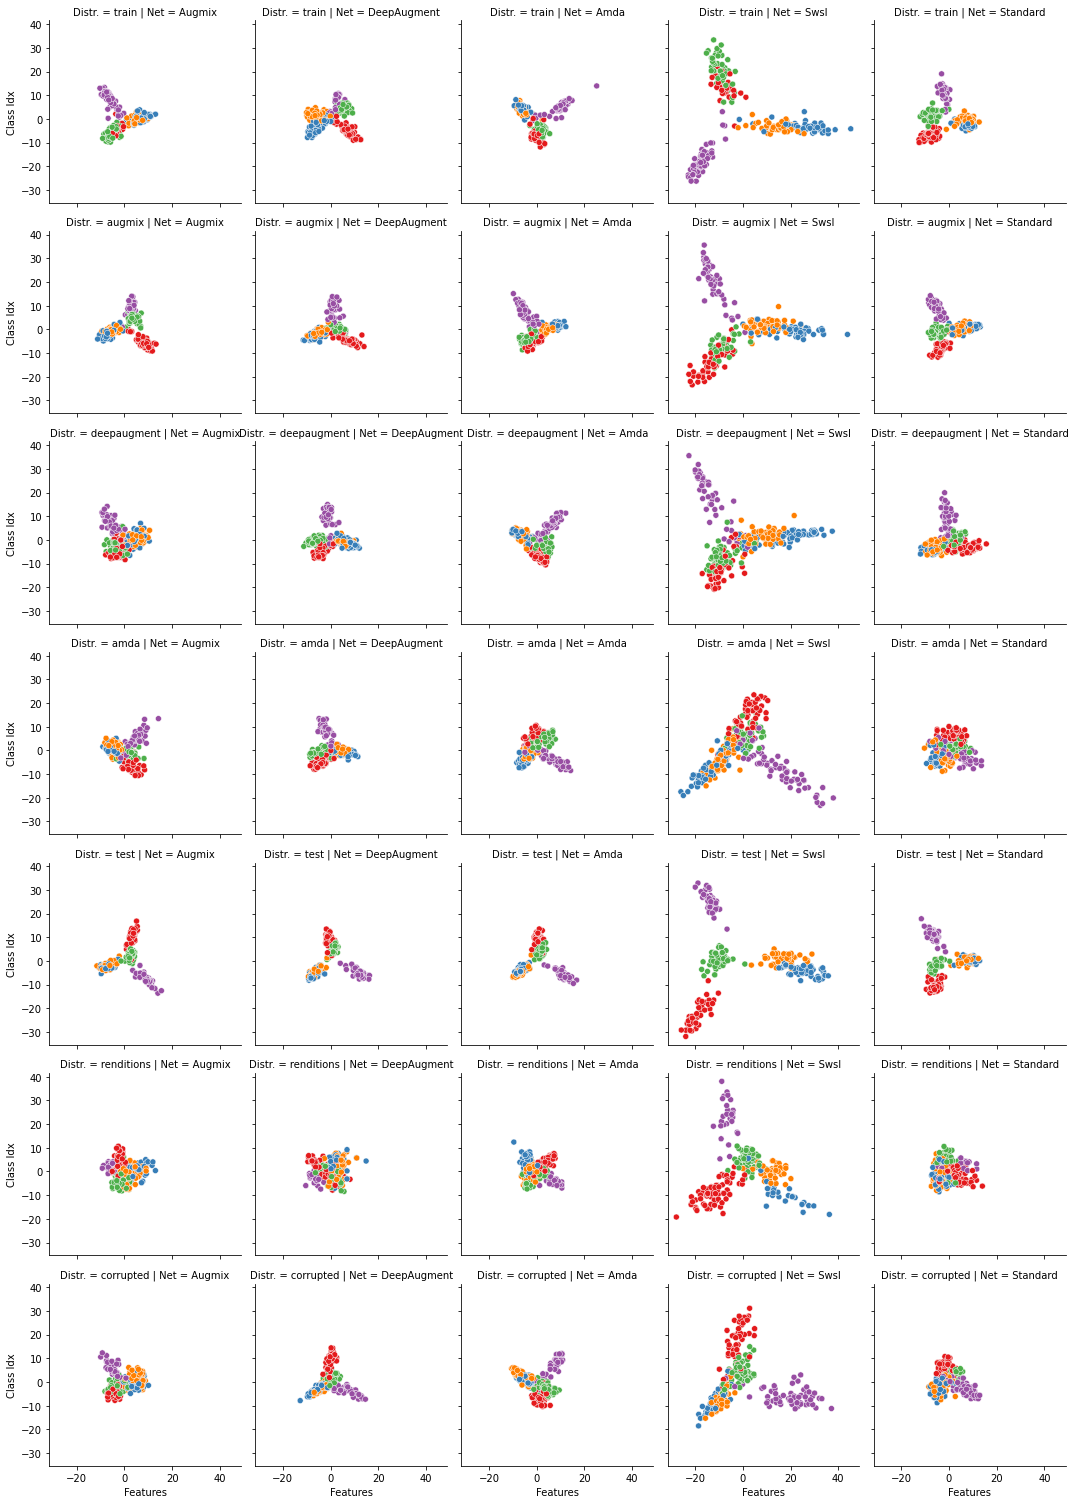

In [23]:
g = sns.FacetGrid(df_part, col="Net", row="Distr.")
g.map(manifold_plot, "Features", "Class Idx", palette="Set1", mode="pca")